# Tugas Besar 1 IF4071 Pembelajaran Mesin

13515025 Kukuh Basuki Rahmat  
13515037 Muhammad Irfan Maulana  
13515071 Daniel Pintara

## Inisialisasi Dataset `iris`

In [4]:
from sklearn.datasets import load_iris

from IPython.display import Markdown

data_iris = load_iris()
data_iris_target_name_map = dict(enumerate(data_iris.target_names))

Markdown(data_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

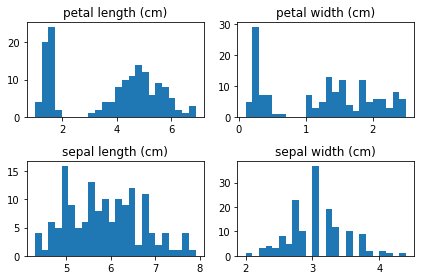

In [5]:
from pandas import DataFrame
from matplotlib.pyplot import tight_layout, show

%matplotlib inline

data_iris_table_view = DataFrame(
    data=data_iris.data, columns=data_iris.feature_names)

data_iris_table_view.hist(bins=24, grid=False)
tight_layout()

## Eksplorasi Algoritma

In [6]:
def build_membership_table(label_entries, target_entries, target_name_map):
    from collections import Counter
    from pandas import DataFrame
    
    unique_label_entries = set(label_entries)
    
    label_target_counter = Counter(zip(label_entries, target_entries))
    membership_table = DataFrame(
        columns=target_name_map.values(), index=unique_label_entries)
    
    for i_model in unique_label_entries:
        row_view = membership_table.loc[i_model]
        
        for i_target, target_name in target_name_map.items():
            row_view[target_name] = label_target_counter[(i_model, i_target)]
    
    return membership_table.astype("int64")

def plot_membership_table(membership_table):
    from itertools import product
    from matplotlib.pyplot import imshow, cm, colorbar, xticks, yticks, text
    from numpy import arange
    
    row_ticks = membership_table.index
    col_ticks = membership_table.columns
    
    imshow(membership_table, interpolation='nearest', cmap=cm.Blues)
    if len(row_ticks) > 1:
        colorbar()
    
    xticks(arange(len(col_ticks)), col_ticks.astype("str"), rotation=45)
    yticks(arange(len(row_ticks)), row_ticks.astype("str"))
    
    threshold_value = (
        membership_table.values.max() + membership_table.values.min()) / 2
    for i, j in product(range(len(row_ticks)), range(len(col_ticks))):
        value = membership_table.iloc[i, j]
        text(
            j, i, value,
            horizontalalignment="center",
            color="white" if value > threshold_value else "black")

### K-Means

/home/nieltg/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/nieltg/.local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


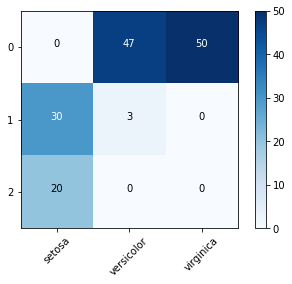

In [7]:
from importlib import reload
# Auto-reload
import ml_course.kmeans
KMEANS = reload(ml_course.kmeans).KMEANS

model = KMEANS(k=3)
predictions = model.fit_predict(data_iris.data)

plot_membership_table(
    build_membership_table(predictions, data_iris.target, data_iris_target_name_map))

### K-Medoids

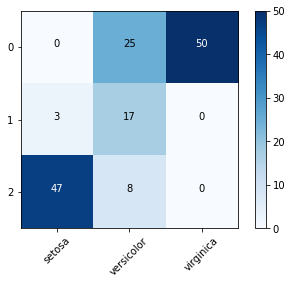

In [8]:
from importlib import reload
# Auto-reload
import ml_course.kmedoids
KMEDOIDS = reload(ml_course.kmedoids).KMEDOIDS

model = KMEDOIDS(k=3, max_iteration=100)
predictions = model.fit_predict(data_iris.data)

plot_membership_table(
    build_membership_table(predictions, data_iris.target, data_iris_target_name_map))

### DBSCAN

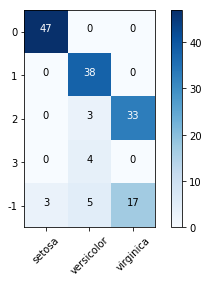

In [14]:
from importlib import reload
# Auto-reload
import ml_course.dbscan
DBSCAN = reload(ml_course.dbscan).DBSCAN

model = DBSCAN(eps=0.4, min_samples=4)
predictions = model.fit_predict(data_iris.data)

plot_membership_table(
    build_membership_table(predictions, data_iris.target, data_iris_target_name_map))

### Agglomerative Clustering

#### Single link

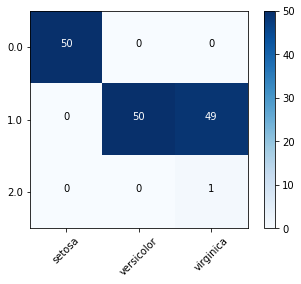

In [15]:
from importlib import reload
# Auto-reload
import ml_course.agglomerative
Agglomerative = reload(ml_course.agglomerative).Agglomerative

model = Agglomerative(n_clusters=3, linkage='single')
predictions = model.fit_predict(data_iris.data)

plot_membership_table(
    build_membership_table(predictions, data_iris.target, data_iris_target_name_map))

#### Complete link

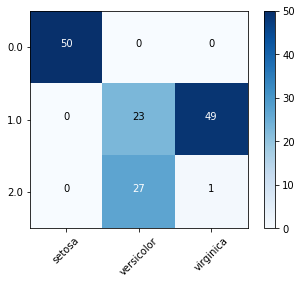

In [16]:
from importlib import reload
# Auto-reload
import ml_course.agglomerative
Agglomerative = reload(ml_course.agglomerative).Agglomerative

model = Agglomerative(n_clusters=3, linkage='complete')
predictions = model.fit_predict(data_iris.data)

plot_membership_table(
    build_membership_table(predictions, data_iris.target, data_iris_target_name_map))

#### Average link

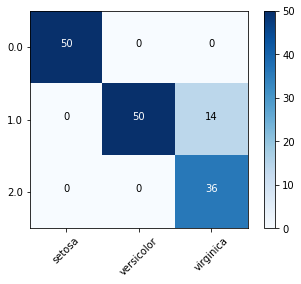

In [17]:
from importlib import reload
# Auto-reload
import ml_course.agglomerative
Agglomerative = reload(ml_course.agglomerative).Agglomerative

model = Agglomerative(n_clusters=3, linkage='average')
predictions = model.fit_predict(data_iris.data)

plot_membership_table(
    build_membership_table(predictions, data_iris.target, data_iris_target_name_map))

#### Average group link

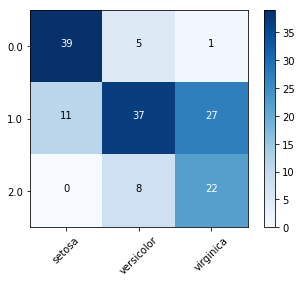

In [18]:
from importlib import reload
# Auto-reload
import ml_course.agglomerative
Agglomerative = reload(ml_course.agglomerative).Agglomerative

model = Agglomerative(n_clusters=3, linkage='average_group')
predictions = model.fit_predict(data_iris.data)

plot_membership_table(
    build_membership_table(predictions, data_iris.target, data_iris_target_name_map))